### Proyecto: Fundamentos de Aprendizaje de Máquina - DataSolutions S.A.

Analista: Camila Garrido

Caso: Definición y diseño de flujos de trabajo de ML para retail, banca y salud.

**1. Clasificación de los Problemas** 

De acuerdo a la naturaleza de los datos y los objetivos de negocio, clasificamos los casos de la siguiente manera:


Problema A: Predecir monto de ventas semanales -> Regresión.

Problema B: Detectar si un cliente abandonará el servicio -> Clasificación.

Problema C: Agrupar clientes bancarios por comportamiento de gasto -> Aprendizaje No Supervisado (Clustering).

In [1]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos y herramientas
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


**2. Selección de Modelos y Justificación**

Para cada problema propuesto, seleccionamos algoritmos que equilibran precisión e interpretabilidad:

Regresión Lineal (Ventas): Permite cuantificar el impacto de variables económicas en el monto de venta.

Árbol de Decisión (Abandono): Ideal para identificar reglas de negocio claras sobre por qué un cliente se va.

K-Means (Banca): Algoritmo eficiente para encontrar grupos naturales de gasto sin etiquetas previas.

In [2]:
# 1. Ingesta y Creación de datos sintéticos
np.random.seed(42)
data = pd.DataFrame({
    'meses_antiguedad': np.random.randint(1, 60, 100),
    'gasto_mensual': np.random.uniform(10, 100, 100),
    'abandono': np.random.choice([0, 1], 100)
})

# 2. Preprocesamiento: Selección de características y etiquetas
X = data[['meses_antiguedad', 'gasto_mensual']]
y = data['abandono']

# 3. Entrenamiento: División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajuste del modelo de Árbol de Decisión
modelo_abandono = DecisionTreeClassifier(max_depth=3)
modelo_abandono.fit(X_train, y_train)

# 4. Evaluación: Métricas requeridas por el caso
predicciones = modelo_abandono.predict(X_test)
acc = accuracy_score(y_test, predicciones)
cm = confusion_matrix(y_test, predicciones)

print(f"--- Evaluación del Caso B ---")
print(f"Precisión (Accuracy): {acc:.2f}")
print("Matriz de Confusión:")
print(cm)


--- Evaluación del Caso B ---
Precisión (Accuracy): 0.55
Matriz de Confusión:
[[ 1  8]
 [ 1 10]]


**3. Diseño del Flujo de Trabajo (Caso B: Abandono de Servicio)**

Para el caso del servicio de streaming, el flujo de trabajo sistemático se divide en las siguientes etapas:

1. **Ingesta de Datos:** Recopilación de variables históricas de clientes (horas de uso, meses de antigüedad, facturación).
2. **Preprocesamiento:** Limpieza de datos nulos, normalización de los montos de gasto y codificación de la variable objetivo (0: se queda, 1: abandona).
3. **Entrenamiento:** División del dataset (80% entrenamiento / 20% prueba) y ajuste del modelo de **Árbol de Decisión**.
4. **Evaluación:** Validación del desempeño mediante el cálculo de la **Precisión (Accuracy)** y la inspección de la **Matriz de Confusión**.
5. **Despliegue:** Implementación del modelo en el sistema de atención al cliente para generar alertas tempranas de retención.

![Esquema del Flujo de Trabajo](diagrama_de_flujo.png)

Ejecución de Código

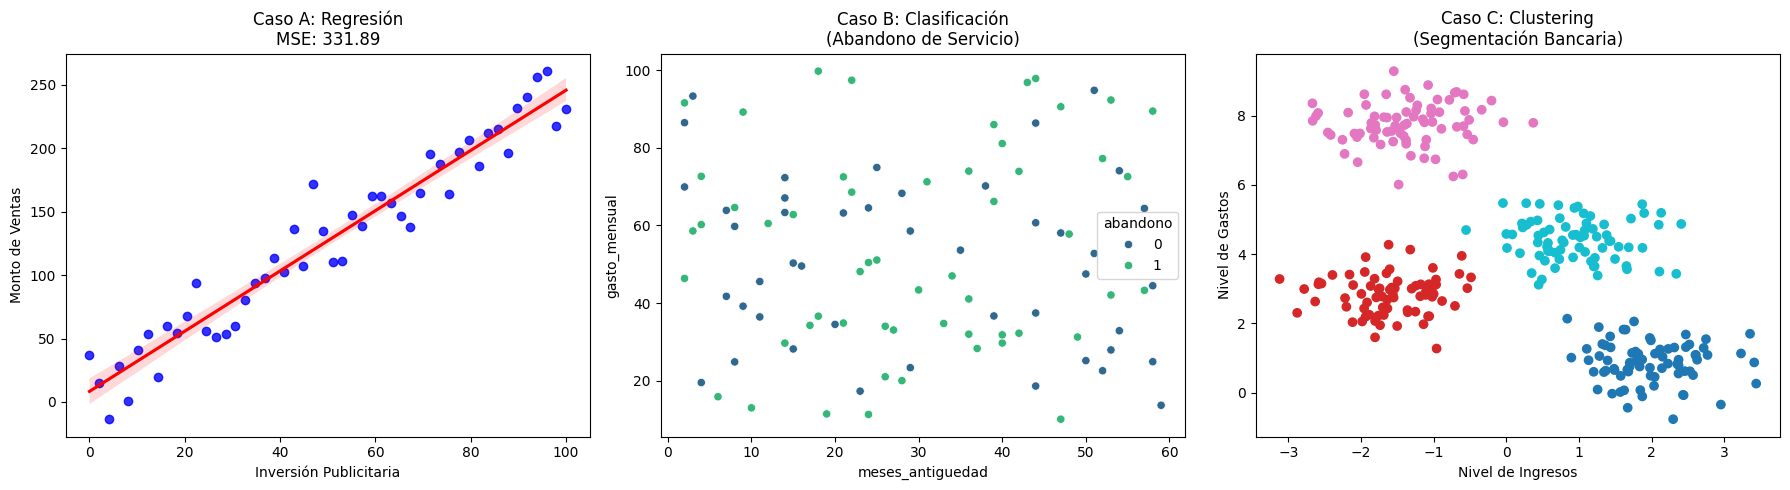

In [3]:
# Configuramos el área de dibujo para 3 gráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- GRÁFICO 1: Problema A (Regresión de Ventas) ---
publicidad = np.linspace(0, 100, 50)
ventas_reales = 2.5 * publicidad + np.random.normal(0, 20, 50)
modelo_lineal = LinearRegression().fit(publicidad.reshape(-1, 1), ventas_reales)
ventas_predichas = modelo_lineal.predict(publicidad.reshape(-1, 1))

# Cálculo del Error Cuadrático Medio (Métrica Requerida)
mse_ventas = mean_squared_error(ventas_reales, ventas_predichas)

sns.regplot(x=publicidad, y=ventas_reales, ax=axes[0], color='blue', line_kws={"color": "red"})
axes[0].set_title(f'Caso A: Regresión\nMSE: {mse_ventas:.2f}')
axes[0].set_xlabel('Inversión Publicitaria')
axes[0].set_ylabel('Monto de Ventas')

# --- GRÁFICO 2: Problema B (Clasificación de Abandono) ---
sns.scatterplot(x='meses_antiguedad', y='gasto_mensual', hue='abandono', data=data, ax=axes[1], palette='viridis')
axes[1].set_title('Caso B: Clasificación\n(Abandono de Servicio)')

# --- GRÁFICO 3: Problema C (Clustering Bancario) ---
X_banca, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=4, n_init=10)
clusters = kmeans.fit_predict(X_banca)

axes[2].scatter(X_banca[:, 0], X_banca[:, 1], c=clusters, cmap='tab10')
axes[2].set_title('Caso C: Clustering\n(Segmentación Bancaria)')
axes[2].set_xlabel('Nivel de Ingresos')
axes[2].set_ylabel('Nivel de Gastos')

plt.tight_layout()
plt.show()

**4. Análisis de Riesgos y Desafíos**
Al implementar estas soluciones en **DataSolutions S.A.**, identificamos:
1. **Caso A (Regresión):** Riesgo de **infraajuste (underfitting)** si la relación entre publicidad y ventas no es lineal.
2. **Caso B (Clasificación):** El desafío de los **datos desbalanceados**; si pocos clientes abandonan, el modelo podría no aprender a detectarlos.
3. **Caso C (Clustering):** El desafío de la **estabilidad de los grupos**; al ser no supervisado, el número de clusters (k) debe validarse con el negocio para que tenga sentido comercial.

**Reflexión Personal**
A través de este análisis, comprendí que el Aprendizaje de Máquina permite a empresas como DataSolutions S.A. pasar de una postura reactiva a una proactiva. La diferencia fundamental entre los modelos supervisados (donde buscamos una respuesta específica) y los no supervisados (donde buscamos estructura oculta) es clave para atacar distintos problemas de negocio. El flujo de trabajo sistemático asegura que los modelos sean evaluados con rigor antes de su despliegue final.